In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [15]:
df_ours = pd.read_csv('../../cache/results/EnronMask_exposure_enron_FT_dp005_mask_e1_PRE_MASK_TRAIN_1.txt', sep='\t')
df = pd.read_csv('../../cache/results/EnronMask_exposure_enron_FT_dp005_benign_e1_None_1.txt', sep='\t')

In [ ]:
df.head()

In [ ]:
df.exposure.max()
df_ours.exposure.max()

In [ ]:
df['type'] = np.where(df['valid_exp'] > 40, 'email', 'phone')
df_ours['type'] = np.where(df_ours['valid_exp'] > 40, 'email', 'phone')

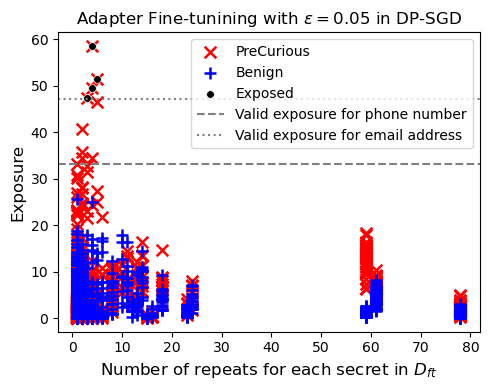

In [20]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df_ours, x='uni_cnt', y='exposure', marker='x', s=70, label='PreCurious', linewidth=1.8, color='red')
sns.scatterplot(data=df, x='uni_cnt', y='exposure', marker='+', s=80, label='Benign', linewidth=1.8, color='blue')

df_valid = df[df['exposure'] >= df['valid_exp']]
df_valid_ours = df_ours[df_ours['exposure'] >= df_ours['valid_exp']]

sns.scatterplot(data=df_valid, x='uni_cnt', y='exposure', marker='o', s=30, color='purple', label='Benign Exposed')
sns.scatterplot(data=df_valid_ours, x='uni_cnt', y='exposure', marker='o', s=30, color='black', label='Exposed')

plt.axhline(y=33.2192809, color='grey', linestyle='--', linewidth=1.5, label='Valid exposure for phone number')
plt.axhline(y=47.00439718141092, color='grey', linestyle=':', linewidth=1.5, label='Valid exposure for email address')
plt.legend()
plt.ylabel(r'Exposure', fontsize=12)
plt.xlabel(r'Number of repeats for each secret in $D_{ft}$', fontsize=12)
plt.title(r'Adapter Fine-tunining with $\epsilon=0.05$ in DP-SGD')
plt.tight_layout()
# plt.savefig('email_50_dp005_e1_exposure.pdf')